<a href="https://colab.research.google.com/github/barbaraperez/Estudo-do-diabetes/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Configurações i:

In [ ]:
## importando bibliotecas principais
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = "https://github.com/barbaraperez/Estudo-do-diabetes/blob/main/datateste_diabetes1.4.xlsx?raw=true" # salva o link da nossa tabela de dados armazenados em arquivo xlsx no github em uma variável
df = pd.read_excel(url, header=0) #pede para o pandas criar um dataframe com esses dados

In [ ]:
print(df.shape) ## número de linhas e colunas dos nossos dados

(66, 7)


In [ ]:
print(df.dtypes) ## tipo dos dados de cada coluna

ano                        int64
pais                      object
idh                      float64
populacao_geral            int64
per_crian_cinc_soprep    float64
kcal_medio                 int64
diabeticos               float64
dtype: object


In [ ]:
print(df.describe()) ## estatísticas descritivas dos dados

               ano        idh  populacao_geral  per_crian_cinc_soprep  \
count    66.000000  60.000000     6.600000e+01              63.000000   
mean   2010.500000   0.784750     8.186593e+07               9.909524   
std       6.392905   0.050022     7.962523e+07               2.392037   
min    2000.000000   0.685000     1.052200e+04               6.200000   
25%    2005.000000   0.756000     1.802928e+07               7.100000   
50%    2010.500000   0.787500     4.063562e+07              10.600000   
75%    2016.000000   0.830250     1.834572e+08              12.050000   
max    2021.000000   0.851000     2.139934e+08              12.900000   

        kcal_medio    diabeticos  
count    66.000000     66.000000  
mean   2415.045455   4531.775606  
std      21.913418   5240.595637  
min    2367.000000    131.100000  
25%    2398.750000   1176.600000  
50%    2414.000000   1638.750000  
75%    2433.000000   7955.975000  
max    2448.000000  15733.600000  


In [ ]:
df.head ## 5 primeiras linhas e 5 últimas linhas

<bound method NDFrame.head of      ano    pais    idh  populacao_geral  per_crian_cinc_soprep  kcal_medio  \
0   2021  Brasil    NaN        213993441                    NaN        2447   
1   2020  Brasil    NaN        212559409                    7.3        2448   
2   2019  Brasil  0.765        211049519                    7.2        2447   
3   2018  Brasil  0.762        209469320                    7.2        2447   
4   2017  Brasil  0.761        207833825                    7.1        2446   
..   ...     ...    ...              ...                    ...         ...   
61  2004   Chile  0.785         16014972                   11.4        2403   
62  2003   Chile  0.776         15849649                   11.5        2397   
63  2002   Chile  0.769         15684413                   11.5        2391   
64  2001   Chile  0.767         15516112                   11.4        2386   
65  2000   Chile  0.756         15342350                   11.3        2378   

    diabeticos  
0   

In [ ]:
print(df.index) 
print()
print(df.columns)

RangeIndex(start=0, stop=66, step=1)

Index(['ano', 'pais', 'idh', 'populacao_geral', 'per_crian_cinc_soprep',
       'kcal_medio', 'diabeticos'],
      dtype='object')


Como vemos acima, as linhas são identificadas por números inteiros de 0 até 66 e as colunas são identificadas por strings, sendo elas:

-   `ano`: ano relativo aqueles dados;
-   `pais`: país de origem daqueles dados;
-   `idh`: Índice de Desenvolvimento Humano daquele país naquele determinado ano;
-   `populacao_geral`: número absoluto de pessoas
-   `per_crian_cinc_soprep`: porcentagem de crianças com 5 anos ou menos que estão com sobrepeso em determinado país em determinado ano
-   `kcal_medio`: necessidade calóriga média em kcal ingerida por dia por pessoas de determinado país em determinado ano
-   `´diabeticos`: número de indivíduos diabéticos em milhar de determinado país a cada ano.

In [ ]:
#Removendo as linhas correspondentes aos anos de 2021 e 2020
df_atualizado = df.drop([0, 1], axis=0)
print(df_atualizado)

     ano    pais    idh  populacao_geral  per_crian_cinc_soprep  kcal_medio  \
2   2019  Brasil  0.765        211049519                    7.2        2447   
3   2018  Brasil  0.762        209469320                    7.2        2447   
4   2017  Brasil  0.761        207833825                    7.1        2446   
5   2016  Brasil  0.758        206163056                    7.1        2446   
6   2015  Brasil  0.756        204471759                    7.1        2445   
..   ...     ...    ...              ...                    ...         ...   
61  2004   Chile  0.785         16014972                   11.4        2403   
62  2003   Chile  0.776         15849649                   11.5        2397   
63  2002   Chile  0.769         15684413                   11.5        2391   
64  2001   Chile  0.767         15516112                   11.4        2386   
65  2000   Chile  0.756         15342350                   11.3        2378   

    diabeticos  
2     15456.00  
3     15246.00  


Essas linhas referentes a 2020 e 2021 serão removidas porque, durante esses anos, enfrentou-se uma pandemia mundial de COVID-19, assim, os números e condições se diferem muito da realidade analisada em outros anos, logo, é preciso eliminá-las para que o modelo não seja mau influenciado.

Matriz de covariância: 


,ano,idh,populacao_geral,per_crian_cinc_soprep,kcal_medio,diabeticos
ano,4.086923e+01,1.516017e-01,4.093290e+07,1.903226e-01,1.134385e+02,1.006065e+04
idh,1.516017e-01,2.502225e-03,-2.925398e+06,9.714364e-02,2.495593e-01,-1.469969e+02
populacao_geral,4.093290e+07,-2.925398e+06,6.340178e+15,-1.592124e+08,4.309748e+08,3.700988e+11
per_crian_cinc_soprep,1.903226e-01,9.714364e-02,-1.592124e+08,5.721843e+00,-1.535868e+01,-9.830960e+03
kcal_medio,1.134385e+02,2.495593e-01,4.309748e+08,-1.535868e+01,4.801979e+02,6.384021e+04
diabeticos,1.006065e+04,-1.469969e+02,3.700988e+11,-9.830960e+03,6.384021e+04,2.746384e+07




Matriz de correlação: 


,ano,idh,populacao_geral,per_crian_cinc_soprep,kcal_medio,diabeticos
ano,1.000000,0.521189,0.080412,0.013035,0.809752,0.300294
idh,0.521189,1.000000,-0.741498,0.810186,0.231751,-0.582029
populacao_geral,0.080412,-0.741498,1.000000,-0.839849,0.246997,0.886924
per_crian_cinc_soprep,0.013035,0.810186,-0.839849,1.000000,-0.295127,-0.798135
kcal_medio,0.809752,0.231751,0.246997,-0.295127,1.000000,0.555909
diabeticos,0.300294,-0.582029,0.886924,-0.798135,0.555909,1.000000


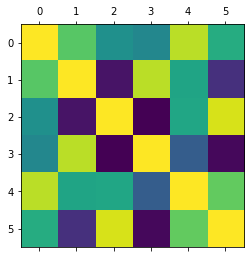

In [ ]:
#matriz de covariancia
df_covariance = df.cov()

# matriz de correlação
df_correlation = df.corr()

print('Matriz de covariância: ')
display(df_covariance)

print('\n\nMatriz de correlação: ')
display(df_correlation)

plt.matshow(df_correlation)
plt.show()

In [ ]:
df_atualizado["diabetes_normalizado"] = df_atualizado["diabeticos"].div(df_atualizado["populacao_geral"].values)
print(df_atualizado)

     ano    pais    idh  populacao_geral  per_crian_cinc_soprep  kcal_medio  \
2   2019  Brasil  0.765        211049519                    7.2        2447   
3   2018  Brasil  0.762        209469320                    7.2        2447   
4   2017  Brasil  0.761        207833825                    7.1        2446   
5   2016  Brasil  0.758        206163056                    7.1        2446   
6   2015  Brasil  0.756        204471759                    7.1        2445   
..   ...     ...    ...              ...                    ...         ...   
61  2004   Chile  0.785         16014972                   11.4        2403   
62  2003   Chile  0.776         15849649                   11.5        2397   
63  2002   Chile  0.769         15684413                   11.5        2391   
64  2001   Chile  0.767         15516112                   11.4        2386   
65  2000   Chile  0.756         15342350                   11.3        2378   

    diabeticos  diabetes_normalizado  
2     15456.

Testes de Gráficos:

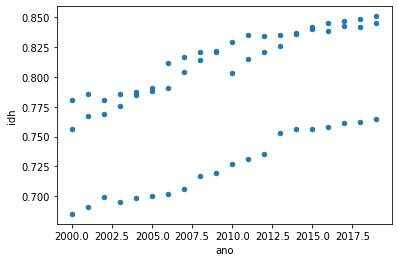

In [ ]:
df_atualizado.plot('ano', 'idh', kind = 'scatter')

In [ ]:
#define index column
#df.set_index('ano', inplace=True)

#group data by product and display sales as line chart
#df.groupby('pais')['idh'].plot(legend=True)

In [ ]:
print(df_atualizado)

     ano    pais    idh  populacao_geral  per_crian_cinc_soprep  kcal_medio  \
2   2019  Brasil  0.765        211049519                    7.2        2447   
3   2018  Brasil  0.762        209469320                    7.2        2447   
4   2017  Brasil  0.761        207833825                    7.1        2446   
5   2016  Brasil  0.758        206163056                    7.1        2446   
6   2015  Brasil  0.756        204471759                    7.1        2445   
..   ...     ...    ...              ...                    ...         ...   
61  2004   Chile  0.785         16014972                   11.4        2403   
62  2003   Chile  0.776         15849649                   11.5        2397   
63  2002   Chile  0.769         15684413                   11.5        2391   
64  2001   Chile  0.767         15516112                   11.4        2386   
65  2000   Chile  0.756         15342350                   11.3        2378   

    diabeticos  diabetes_normalizado  
2     15456.

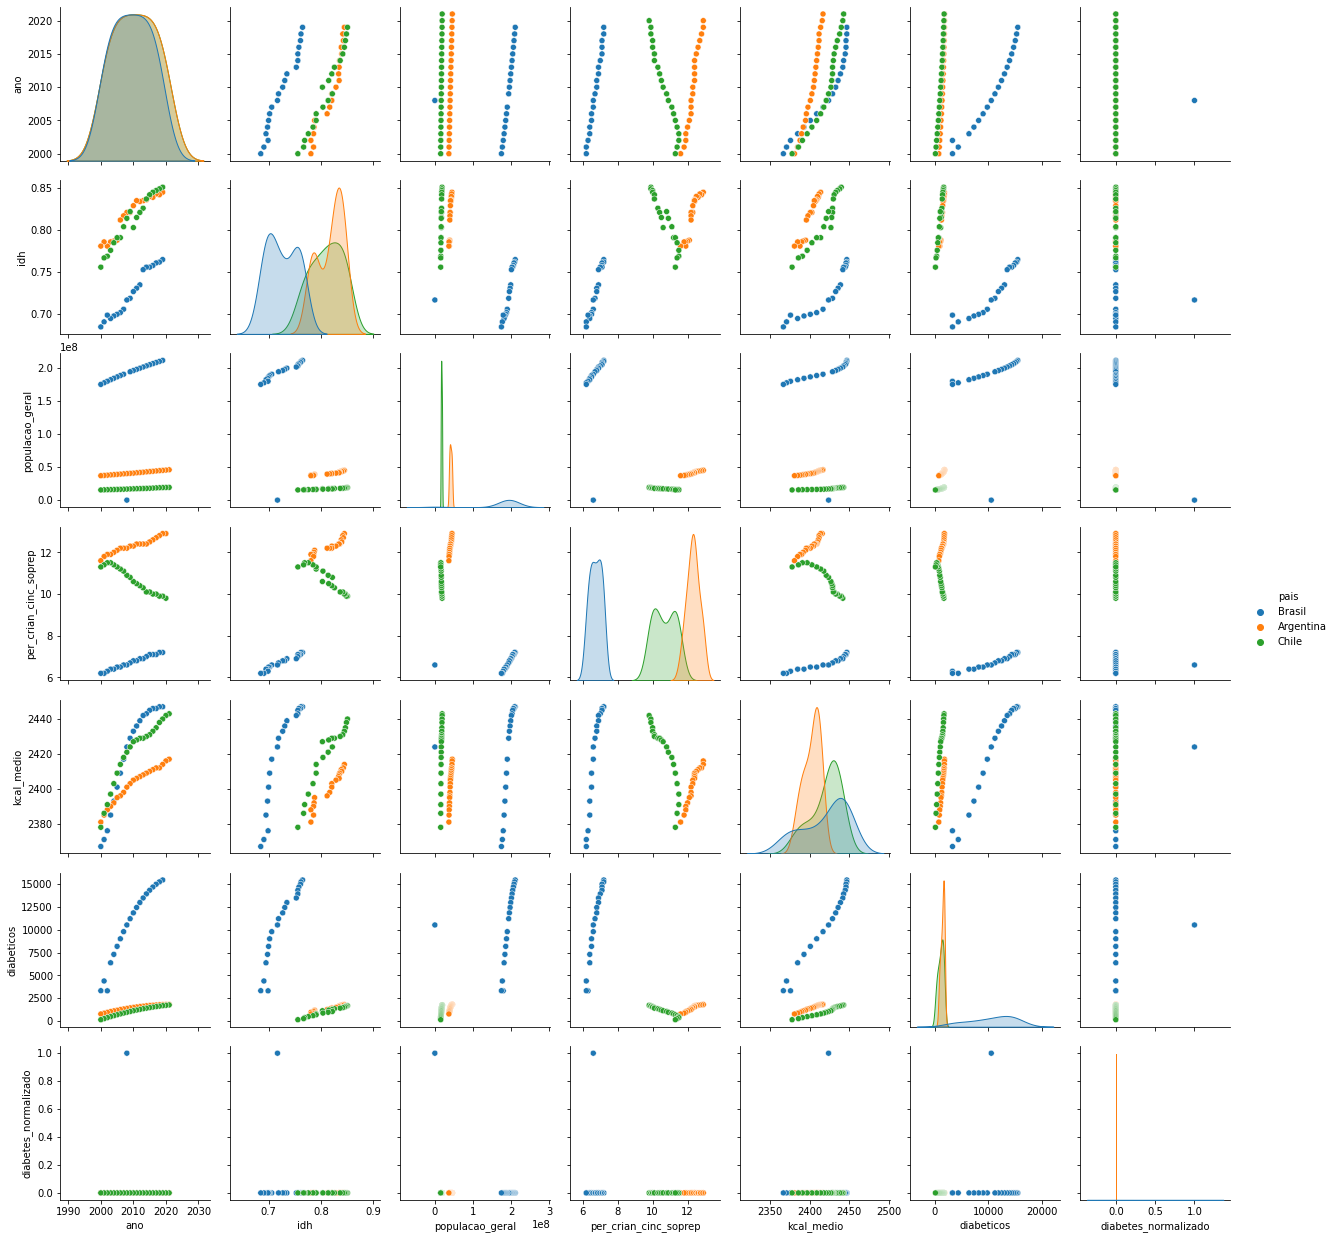

In [ ]:
sns.pairplot(df_atualizado, hue='pais')
plt.show() ## plotamos alguns gráficos usando pairplot

Com os gráficos acima, podemos perceber que o comportamento do Chile e da Argentina são bem semelhantes, enquanto o comportamento do Brasil se diferencia bastante em relação a eles.